In [20]:
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder

#Machine Learning
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.cluster import KMeans

# Dataframe

In [2]:
df=pd.read_csv("C:\\Users\\Saravanan\\OneDrive\\Desktop\\Datasets_data\\road_accident_data_by_vehicle_type.csv")

In [3]:
df

,Location,Motor Car,Dual Purpose Vehicle,Lorry,Cycle,Motor Cycle/Moped,Three wheeler,"Articulated Vehicle, prime mover",SLT Bus,Private Bus,Intercity Bus,Land Vehicle/Tractor,Animal drawn vehicle or rider on animal,Other
0,Ampara,59,102,121,93,575,169,4,15,35,1,41,4,0
1,Anuradhapura,116,224,246,158,845,196,2,28,104,3,72,0,6
2,Badulla (Badulla & Bandarawela Divisions),82,121,171,20,266,219,2,58,78,1,16,0,5
3,Batticaloa,26,43,30,64,224,52,4,9,25,1,24,1,2
4,Chilaw (Chilaw & Puttalam Divisions),102,213,224,134,530,163,14,23,84,1,19,1,3
5,"Colombo (Colombo-South, North, Central, Mt. La...",4708,2675,1686,221,2835,2804,110,190,1194,4,59,0,63
6,Galle (Galle & Elpitiya Divisions),488,377,348,216,1346,586,16,73,224,3,16,0,9
7,"Gampaha (Gampaha, Negombo & Kelaniya Divisions)",2018,1688,1352,317,2598,1466,175,123,590,9,38,4,6
8,Jaffna (Jaffna & KKS Divisions),32,64,46,73,213,63,1,8,21,0,28,0,0
9,Kalutara (Kalutara & Panadura Divisions),381,398,337,226,1022,525,15,53,238,4,15,0,6


# Observation

Depedent - Location
Independent - Motor,Car,Dual Purpose Vehicle,Lorry,Cycle,Motor Cycle/Moped,Three wheeler,Articulated Vehicle, prime mover,SLT Bus,Private Bus,Intercity Bus,Land Vehicle/Tractor,Animal drawn vehicle or rider on animal,Other

In [12]:
continuous_columns=['Motor Car','Dual Purpose Vehicle','Lorry','Cycle','Motor Cycle/Moped','Three wheeler','Articulated Vehicle, prime mover','SLT Bus','Private Bus','Intercity Bus','Land Vehicle/Tractor','Other']
category_columns=['Location','Animal drawn vehicle or rider on animal']

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Location                                 25 non-null     object
 1   Motor Car                                25 non-null     int64 
 2   Dual Purpose Vehicle                     25 non-null     int64 
 3   Lorry                                    25 non-null     int64 
 4   Cycle                                    25 non-null     int64 
 5   Motor Cycle/Moped                        25 non-null     int64 
 6   Three wheeler                            25 non-null     int64 
 7   Articulated Vehicle, prime mover         25 non-null     int64 
 8   SLT Bus                                  25 non-null     int64 
 9   Private Bus                              25 non-null     int64 
 10  Intercity Bus                            25 non-null     int64 


In [6]:
df.isnull().sum()

Location                                   0
Motor Car                                  0
Dual Purpose Vehicle                       0
Lorry                                      0
Cycle                                      0
Motor Cycle/Moped                          0
Three wheeler                              0
Articulated Vehicle, prime mover           0
SLT Bus                                    0
Private Bus                                0
Intercity Bus                              0
Land Vehicle/Tractor                       0
Animal drawn vehicle or rider on animal    0
Other                                      0
dtype: int64

In [7]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [8]:
df['Other'].unique()

array([ 0,  6,  5,  2,  3, 63,  9, 18, 12,  1, 17,  7, 14,  4],
      dtype=int64)

In [9]:
df.head()

,Location,Motor Car,Dual Purpose Vehicle,Lorry,Cycle,Motor Cycle/Moped,Three wheeler,"Articulated Vehicle, prime mover",SLT Bus,Private Bus,Intercity Bus,Land Vehicle/Tractor,Animal drawn vehicle or rider on animal,Other
0,Ampara,59,102,121,93,575,169,4,15,35,1,41,4,0
1,Anuradhapura,116,224,246,158,845,196,2,28,104,3,72,0,6
2,Badulla (Badulla & Bandarawela Divisions),82,121,171,20,266,219,2,58,78,1,16,0,5
3,Batticaloa,26,43,30,64,224,52,4,9,25,1,24,1,2
4,Chilaw (Chilaw & Puttalam Divisions),102,213,224,134,530,163,14,23,84,1,19,1,3


# Hypothesis testing / Statistical analysis

Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [13]:
def hypothesisTesting(df, continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"


  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is no relationship"
                hypothesis_df[column_2][column_1] = "There is no relationship"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is a relationship"
                hypothesis_df[column_2][column_1] = "There is a relationship"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return oneContinesColumn_result, hypothesis_df

In [14]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(df,continuous_columns , category_columns)

c:\Users\Saravanan\OneDrive\Desktop\Dataset\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\Saravanan\OneDrive\Desktop\Dataset\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Saravanan\AppData\Local\Temp\ipykernel_7456\1004787033.py:48: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, li

In [15]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,Motor Car,Dual Purpose Vehicle,Lorry,Cycle,Motor Cycle/Moped,Three wheeler,"Articulated Vehicle, prime mover",SLT Bus,Private Bus,Intercity Bus,Land Vehicle/Tractor,Other
Population Mean,403.32,347.56,300.12,93.16,657.32,400.4,16.52,46.52,166.04,1.8,23.04,7.12
Sample Means,{394.91999999999996},{301.95500000000004},{299.19500000000005},{89.61},{653.7049999999999},{364.15},{16.345},{46.865},{190.68},{1.645},{22.96},{5.81}
H0_accepted,0,0,0,0,0,0,0,0,0,0,0,0
H0_rejected,5,5,5,5,5,5,5,5,5,5,5,5
Conclusion,"H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig..."


In [16]:
comperativeColumn_result

,Location,Motor Car,Dual Purpose Vehicle,Lorry,Cycle,Motor Cycle/Moped,Three wheeler,"Articulated Vehicle, prime mover",SLT Bus,Private Bus,Intercity Bus,Land Vehicle/Tractor,Animal drawn vehicle or rider on animal,Other
Location,NaN,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
Motor Car,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship
Dual Purpose Vehicle,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship
Lorry,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship
Cycle,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship
Motor Cycle/Moped,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship
Three wheeler,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship
"Articulated Vehicle, prime mover",There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
SLT Bus,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship
Private Bus,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship


In [18]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
correlation_matrix

,Motor Car,Dual Purpose Vehicle,Lorry,Cycle,Motor Cycle/Moped,Three wheeler,"Articulated Vehicle, prime mover",SLT Bus,Private Bus,Intercity Bus,Land Vehicle/Tractor,Animal drawn vehicle or rider on animal,Other
Motor Car,1.000000,0.982625,0.938132,0.564005,0.862189,0.976899,0.786851,0.807596,0.975908,0.564443,0.451953,0.123532,0.886493
Dual Purpose Vehicle,0.982625,1.000000,0.982295,0.647289,0.920462,0.982417,0.865225,0.852861,0.982088,0.685358,0.467751,0.195937,0.838550
Lorry,0.938132,0.982295,1.000000,0.698338,0.951255,0.965849,0.893579,0.886997,0.963412,0.779757,0.461243,0.231383,0.789167
Cycle,0.564005,0.647289,0.698338,1.000000,0.867273,0.594412,0.719525,0.524344,0.597340,0.804001,0.535009,0.307093,0.370232
Motor Cycle/Moped,0.862189,0.920462,0.951255,0.867273,1.000000,0.895465,0.868628,0.821950,0.893898,0.832529,0.550981,0.276366,0.694734
Three wheeler,0.976899,0.982417,0.965849,0.594412,0.895465,1.000000,0.789734,0.893490,0.996294,0.664682,0.404970,0.138088,0.882369
"Articulated Vehicle, prime mover",0.786851,0.865225,0.893579,0.719525,0.868628,0.789734,1.000000,0.657480,0.774513,0.778201,0.387338,0.441420,0.491228
SLT Bus,0.807596,0.852861,0.886997,0.524344,0.821950,0.893490,0.657480,1.000000,0.903815,0.728767,0.304987,0.081654,0.819080
Private Bus,0.975908,0.982088,0.963412,0.597340,0.893898,0.996294,0.774513,0.903815,1.000000,0.663120,0.412626,0.103890,0.895186
Intercity Bus,0.564443,0.685358,0.779757,0.804001,0.832529,0.664682,0.778201,0.728767,0.663120,1.000000,0.330467,0.335967,0.391591


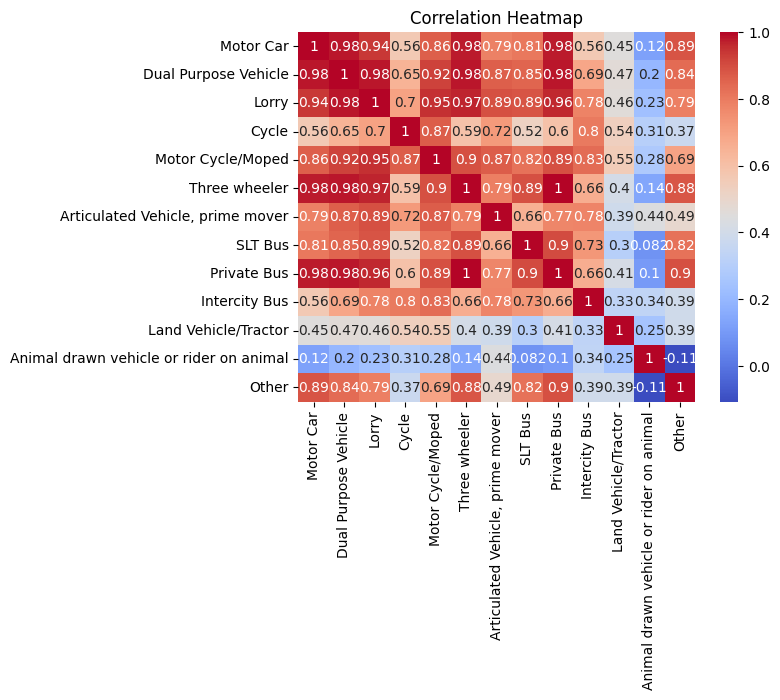

In [21]:
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

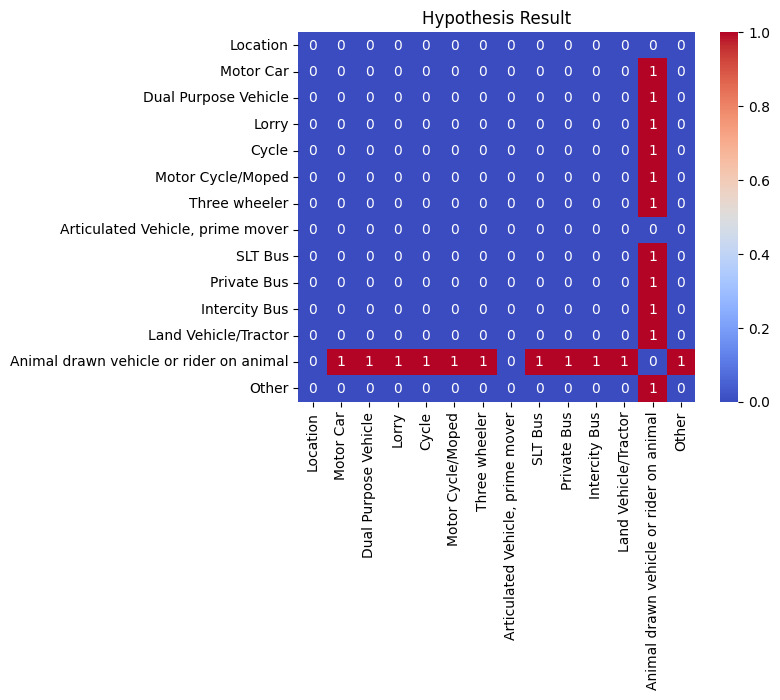

In [22]:
sns.heatmap(comperativeColumn_result=="There is a relationship",annot=True,cmap="coolwarm")
plt.title('Hypothesis Result')
plt.show()

# Data Visualisation

In [23]:
df.columns

Index(['Location', 'Motor Car', 'Dual Purpose Vehicle', 'Lorry', 'Cycle',
       'Motor Cycle/Moped', 'Three wheeler',
       'Articulated Vehicle, prime mover', 'SLT Bus', 'Private Bus',
       'Intercity Bus', 'Land Vehicle/Tractor',
       'Animal drawn vehicle or rider on animal', 'Other'],
      dtype='object')

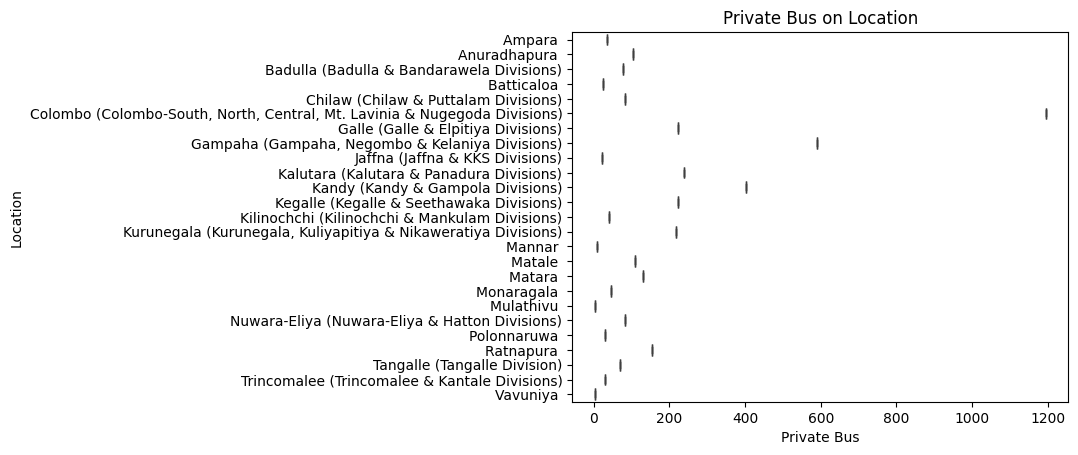

In [25]:
sns.boxplot(x='Private Bus', y='Location', data=df)
plt.xlabel('Private Bus')
plt.ylabel('Location')
plt.title('Private Bus on Location')
plt.show()

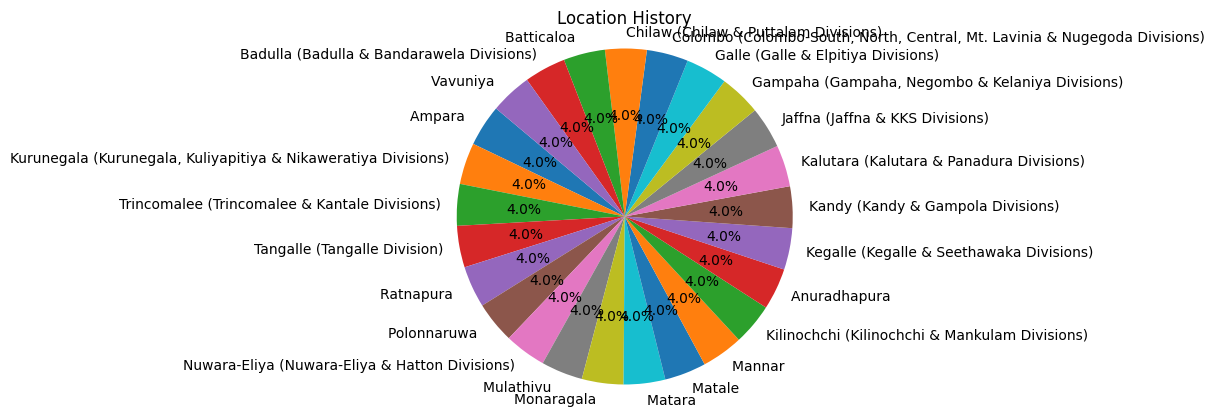

In [26]:
Location_counts = df['Location'].value_counts()
plt.pie(Location_counts, labels=Location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Location History')
plt.axis('equal')
plt.show()